In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
sector = {'basic materials': ['VMC', 'VALE', 'SCCO', 'RIO', 'PKX', 'IFF', 'MT', 'LIN', 'BHP', 'BBL'],
          'communication service': ['WPP', 'VZ', 'TU', 'RELX', 'OMC', 'NFLX', 'GOOG', 'EA', 'DISCA', 'DIS'],
          'consumer cyclical' : ['TM', 'SBUX', 'NKE', 'MCD', 'LVS', 'HD', 'GM', 'FORD', 'EBAY', "AMZN"],
          'consumer defensive': ['UL', 'NWL', 'KR', 'K', 'GIS', 'DEO', 'CPB', 'CCEP', 'BTI', "BG"],
          'energy' : ['XOM', 'TOT', 'SNP', 'RDS-B', 'PTR', 'EQNR', 'CVX', 'COP', "BP", 'ENB'],
          'financial service' : ['WFC-PL', 'V', 'TD', 'MS', 'MA', 'JPM', 'GS', 'C', 'BRK-A', 'BAC-PL'],
          'industrial' : ['PCAR', 'LUV', 'JCI', 'GE', 'GD', 'DE', 'DAL', 'CMI', 'CAT', 'ABB'],
          'health care' : ['ZBH', 'SNY', 'PFE', 'JNJ', 'GSK', 'FMS', 'CNC', 'CI', 'CAH', 'ANTM'],
          'real estate' : ['WY', 'WPC', 'VTR', 'SPG', 'O', 'NLY', 'MPW', 'HST', 'AVB', "ARE"],
          'technology' : ['TXN', 'TSM', 'STM', 'SAP', 'MU', 'INTC', 'IBM', 'HPQ', 'CSCO', 'AAPL']}

temp_dir = {'SYMBOL' : [],
            'INDUSTRIES' : [],
            'RETURN' : [],
            'MARKET RETURN': [],
            'SCORE' : []}

for sec in sector.keys():
    for ticker in sector[sec]:
        with open(f'{sec}/score/{ticker}.pkl', 'rb') as f:
            rank = pickle.load(f)
            df = pd.read_csv(f'data/{ticker}.csv')['stock_price']
            ret = ((df.iloc[-1] - df.iloc[0])/df.iloc[0]) * 100
            
            temp_dir['SYMBOL'].append(rank[0])
            temp_dir['INDUSTRIES'].append(rank[1])
            temp_dir['RETURN'].append(float(f'{rank[3]:.2f}'))
            temp_dir['MARKET RETURN'].append(float(f'{ret:.2f}'))
            temp_dir['SCORE'].append(float(f'{rank[2]:.2f}'))

            
ranking = pd.DataFrame(temp_dir)
ranking = ranking.sort_values('SCORE', ascending=False)
ranking['RANK'] = [i for i in range(1, len(ranking) + 1)]
ranking.set_index('RANK', inplace=True)
ranking

,SYMBOL,INDUSTRIES,RETURN,MARKET RETURN,SCORE
RANK,,,,,
1,WY,Real Estate,109.79,-5.01,10.87
2,STM,Technology,186.09,65.71,6.63
3,CPB,Consumer Defensive,40.94,2.03,5.85
4,IFF,Basic Materials,16.98,-29.58,5.52
5,SCCO,Basic Materials,74.47,33.17,5.42
...,...,...,...,...,...
96,HD,Consumer Cyclical,-10.71,41.26,-5.62
97,SBUX,Consumer Cyclical,-4.15,85.63,-8.06
98,MA,Financial Services,11.61,134.97,-8.09


In [4]:
ranking.groupby('INDUSTRIES').mean().sort_values(by='SCORE', ascending=False)

,RETURN,MARKET RETURN,SCORE
INDUSTRIES,,,
Energy,-16.441,-38.562,1.930
Real Estate,12.933,-2.944,1.750
Basic Materials,24.700,16.105,1.259
Communication Services,37.699,32.064,1.199
Healthcares,16.370,8.153,0.966
Consumer Defensive,4.352,-3.026,0.536
Industrials,9.700,3.583,0.355
Financial Services,18.933,30.729,-0.179
Consumer Cyclical,36.373,53.142,-1.355


In [5]:
ranking['RETURN'].mean()

17.781899999999997

In [5]:
ranking[ranking['INDUSTRIES'] == 'Energy']

,SYMBOL,INDUSTRIES,RETURN,MARKET RETURN,SCORE
RANK,,,,,
10,COP,Energy,22.326266,-27.711493,4.534028
18,TOT,Energy,9.760835,-24.986575,3.523890
22,PTR,Energy,-28.438243,-57.333334,2.959738
27,EQNR,Energy,0.369148,-25.363636,2.348318
28,XOM,Energy,-33.845739,-51.522990,2.332854
29,CVX,Energy,-10.510882,-33.806243,2.199123
34,SNP,Energy,-22.616000,-41.423695,1.764657
44,ENB,Energy,-8.691048,-20.303936,1.182704
59,RDS-B,Energy,-43.332752,-51.598503,0.004924


In [6]:
ranking[ranking['INDUSTRIES'] == 'Real Estate']

,SYMBOL,INDUSTRIES,RETURN,MARKET RETURN,SCORE
RANK,,,,,
1,WY,Real Estate,109.786804,-5.014166,10.869924
6,WPC,Real Estate,24.879605,3.217322,5.401321
13,MPW,Real Estate,82.177293,57.556045,4.192969
33,VTR,Real Estate,7.273857,-17.938417,1.774714
36,SPG,Real Estate,-27.300407,-50.539381,1.712667
56,NLY,Real Estate,-22.685888,-27.592119,0.439659
62,HST,Real Estate,-28.361187,-26.629891,-0.502237
78,ARE,Real Estate,18.680015,37.166175,-1.485158
83,O,Real Estate,-6.963294,9.802189,-1.650534


In [7]:
ranking[ranking['INDUSTRIES'] == 'Basic Materials']

,SYMBOL,INDUSTRIES,RETURN,MARKET RETURN,SCORE
RANK,,,,,
4,IFF,Basic Materials,16.981856,-29.580747,5.518894
5,SCCO,Basic Materials,74.474755,33.169736,5.424789
15,VMC,Basic Materials,48.793981,12.466826,3.793076
21,PKX,Basic Materials,8.939935,-24.335152,3.311148
38,VALE,Basic Materials,44.275652,31.245103,1.655694
39,MT,Basic Materials,-7.373151,-32.805169,1.611463
66,RIO,Basic Materials,23.714658,37.388130,-0.657271
74,LIN,Basic Materials,47.116953,68.711189,-1.250330
87,BBL,Basic Materials,-0.164248,27.292364,-2.309114


In [8]:
ranking[ranking['INDUSTRIES'] == 'Healthcares']

,SYMBOL,INDUSTRIES,RETURN,MARKET RETURN,SCORE
RANK,,,,,
7,CNC,Healthcares,66.994135,17.028952,5.078654
14,CI,Healthcares,39.273444,2.774484,4.183411
24,ZBH,Healthcares,44.441138,24.206029,2.709432
37,JNJ,Healthcares,23.099784,13.035991,1.692725
53,GSK,Healthcares,3.738158,-0.352020,0.592046
64,ANTM,Healthcares,28.479426,42.075220,-0.619348
65,CAH,Healthcares,-20.130151,-15.293371,-0.639247
67,SNY,Healthcares,5.912334,12.165283,-0.686501
76,PFE,Healthcares,-2.457508,6.470201,-1.288565


In [9]:
ranking[ranking['INDUSTRIES'] == 'Communication Services']

,SYMBOL,INDUSTRIES,RETURN,MARKET RETURN,SCORE
RANK,,,,,
12,NFLX,Communication Services,213.250655,168.926225,4.223527
17,WPP,Communication Services,-2.391422,-40.630142,3.542770
23,OMC,Communication Services,12.731507,-14.291601,2.790298
35,DIS,Communication Services,30.862771,62.057234,1.720816
41,VZ,Communication Services,13.447865,9.751544,1.590646
48,DISCA,Communication Services,30.985060,30.203372,0.831245
52,EA,Communication Services,25.607737,31.201471,0.646616
55,GOOG,Communication Services,63.744535,64.495775,0.498554
69,RELX,Communication Services,0.446860,4.270614,-0.777418


In [10]:
ranking[ranking['INDUSTRIES'] == 'Industrials']

,SYMBOL,INDUSTRIES,RETURN,MARKET RETURN,SCORE
RANK,,,,,
11,CAT,Industrials,58.036679,15.906783,4.501568
16,JCI,Industrials,54.738964,21.867645,3.732348
20,LUV,Industrials,7.602173,-29.687736,3.361906
31,DAL,Industrials,-3.145393,-29.132891,1.844476
43,PCAR,Industrials,23.427597,18.159412,1.381577
50,GE,Industrials,-24.534252,-37.530589,0.702446
79,ABB,Industrials,-7.079720,3.478899,-1.502597
84,CMI,Industrials,7.240774,28.261611,-1.858724
91,DE,Industrials,15.617183,70.274031,-3.843382


In [11]:
ranking[ranking['INDUSTRIES'] == 'Financial Services']

,SYMBOL,INDUSTRIES,RETURN,MARKET RETURN,SCORE
RANK,,,,,
19,BRK-A,Financial Services,23.709655,17.602407,3.377315
26,BAC-PL,Financial Services,21.108637,15.745423,2.478639
40,C,Financial Services,2.929658,-17.079076,1.598624
42,TD,Financial Services,8.124594,-4.226789,1.540973
51,V,Financial Services,96.340333,91.013878,0.668790
54,JPM,Financial Services,16.340851,17.711907,0.534473
68,MS,Financial Services,12.281733,31.308681,-0.709025
75,WFC-PL,Financial Services,8.067450,17.113786,-1.267645
85,GS,Financial Services,-11.183493,3.144676,-1.917746


In [12]:
ranking[ranking['INDUSTRIES'] == 'Consumer Defensive']

,SYMBOL,INDUSTRIES,RETURN,MARKET RETURN,SCORE
RANK,,,,,
3,CPB,Consumer Defensive,40.943054,2.025742,5.848423
9,NWL,Consumer Defensive,32.863888,-32.901391,4.900275
46,BG,Consumer Defensive,5.940697,-3.544633,0.924077
47,BTI,Consumer Defensive,-28.024557,-44.194699,0.893630
49,UL,Consumer Defensive,12.114038,10.045583,0.705414
61,K,Consumer Defensive,-5.422839,-8.444904,-0.105133
73,DEO,Consumer Defensive,0.614079,9.426026,-1.168474
81,GIS,Consumer Defensive,-8.727247,-0.406507,-1.593797
82,KR,Consumer Defensive,-1.681125,12.226152,-1.622960


In [13]:
ranking[ranking['INDUSTRIES'] == 'Consumer Cyclical']

,SYMBOL,INDUSTRIES,RETURN,MARKET RETURN,SCORE
RANK,,,,,
8,LVS,Consumer Cyclical,45.430969,-13.748191,4.969562
25,MCD,Consumer Cyclical,37.293007,23.877151,2.670295
30,FORD,Consumer Cyclical,127.919162,45.600004,1.958286
45,GM,Consumer Cyclical,12.150977,-0.382775,1.081237
57,TM,Consumer Cyclical,16.982209,20.409763,0.241266
71,NKE,Consumer Cyclical,75.339259,122.822488,-0.937336
93,AMZN,Consumer Cyclical,76.410909,173.919471,-4.507828
95,EBAY,Consumer Cyclical,-12.925152,32.028371,-5.336586
96,HD,Consumer Cyclical,-10.707433,41.264690,-5.617308


In [14]:
ranking[ranking['INDUSTRIES'] == 'Technology']

,SYMBOL,INDUSTRIES,RETURN,MARKET RETURN,SCORE
RANK,,,,,
2,STM,Technology,186.093753,65.714284,6.632309
32,MU,Technology,56.715742,72.154805,1.794551
58,INTC,Technology,7.641586,6.339384,0.239305
60,IBM,Technology,-15.265597,-18.392222,0.003071
63,SAP,Technology,9.758563,16.015660,-0.548621
70,TXN,Technology,39.718543,55.470309,-0.886077
72,HPQ,Technology,2.604940,15.337713,-1.024914
86,CSCO,Technology,-3.061579,15.156972,-1.977793
99,TSM,Technology,15.087842,165.821550,-8.981164


In [15]:
ranking['SCORE'].mean()

0.5080470970966104

In [16]:
sum(ranking['SCORE'] > 0)

60

In [8]:
(ranking['RETURN'] - ranking['MARKET RETURN']).mean()

1.8401000000000007

In [6]:
ranking['RETURN'].mean()

17.781899999999997

In [7]:
ranking['MARKET RETURN'].mean()

15.941799999999999

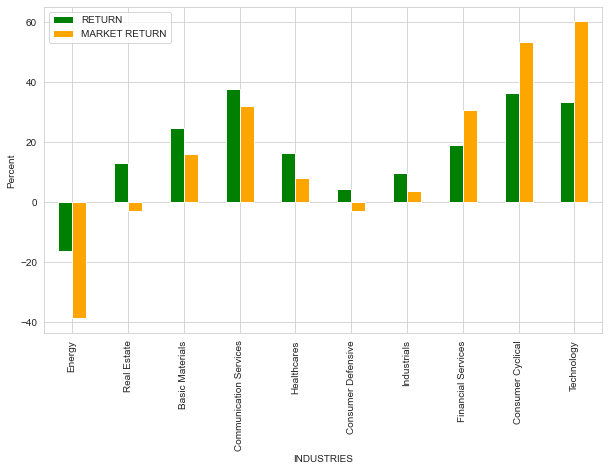

In [32]:
ranking.groupby('INDUSTRIES').mean().sort_values(by='SCORE', ascending=False).drop('SCORE', axis=1).plot.bar(color=['green', 'orange'], figsize=(10,6));
plt.ylabel('Percent');

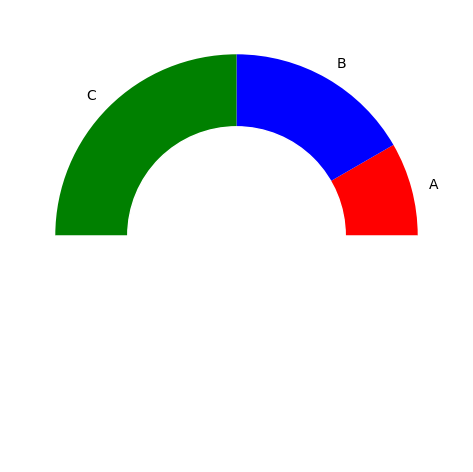

In [2]:
import matplotlib.pyplot as plt

# data
label = ["A", "B", "C"]
val = [1,2,3]

# append data and assign color
label.append("")
val.append(sum(val))  # 50% blank
colors = ['red', 'blue', 'green', 'white']

# plot
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.pie(val, labels=label, colors=colors)
ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))


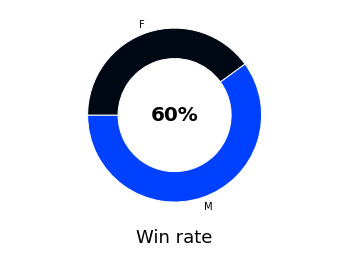

In [14]:
def make_pie(sizes, text,colors,labels):

    col = [[i/255. for i in c] for c in colors]

    
    fig, ax = plt.subplots()
    ax.axis('equal')
    width = 0.35
    kwargs = dict(colors=col, startangle=180)
    outside, _ = ax.pie(sizes, radius=1, pctdistance=1-width/2,labels=labels,**kwargs)
    plt.setp( outside, width=width, edgecolor='white')

    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    ax.set_xlabel('Win rate', fontsize=18)
    plt.show()

c1 = (0, 64, 255)
c2 = (0, 8, 20)

make_pie([60,40], "60%",[c1,c2],['M','F'])

In [31]:
c1 = (0, 64, 255)
c2 = (0, 8, 20)

col = [[i / 255. for i in c] for c in [c1, c2]]

In [33]:
col

[[0.0, 0.25098039215686274, 1.0],
 [0.0, 0.03137254901960784, 0.0784313725490196]]

<AxesSubplot:ylabel='Density'>

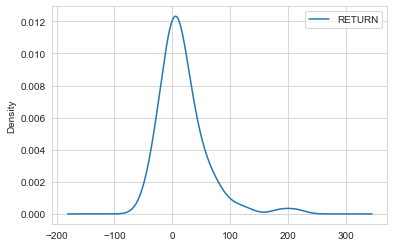

In [58]:
ranking[['RETURN']].plot.kde()


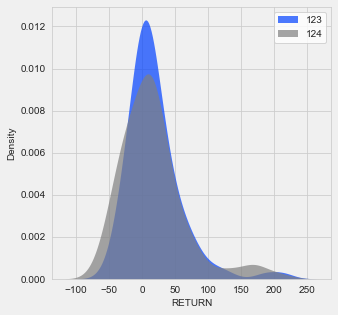

In [74]:
fig,ax1 = plt.subplots(figsize=(5,5))
sns.kdeplot(
   data=ranking["RETURN"],
   fill=True, common_norm=False, color="#0040ff",
   alpha=.7, linewidth=0,label='123'
)
sns.kdeplot(
   data=ranking["MARKET RETURN"],
   fill=True, common_norm=True, color="grey",
   alpha=.7, linewidth=0,label='124'
)
fig.patch.set_facecolor('#F0F0F0')
ax1.set_facecolor('#F0F0F0')
plt.legend()

In [40]:
from tkinter import *
  

class Table:
      
    def __init__(self,root):
          
        # code for creating table
        for i in range(total_rows):
            for j in range(total_columns):
                  
                self.e = Entry(root, width=20, fg='black',
                               font=('tahoma',12))
                  
                self.e.grid(row=i, column=j)
                self.e.insert(END, ranking.values[i][j])
  
# take the data
lst = [(1,'Raj','Mumbai',19),
       (2,'Aaryan','Pune',18),
       (3,'Vaishnavi','Mumbai',20),
       (4,'Rachna','Mumbai',21),
       (5,'Shubham','Delhi',21)]
   
# find total number of rows and
# columns in list
total_rows = len(ranking.values)
total_columns = len(ranking.values[0])
   
# create root window
root = Tk()
t = Table(root)
root.mainloop()

In [22]:
ranking.values

array(['WY', 'Real Estate', 109.7868039822789, -5.014165711101191,
       10.869924215428446], dtype=object)

In [25]:
total_rows

100

In [26]:
total_columns

100

In [15]:
import tkinter as tk
from tkinter import ttk

def show():


    for i, (name, ind, ret, mar_ret, score) in enumerate(ranking.values, start=1):
        listBox.insert("", "end", values=(i, name, ind, ret, mar_ret, score))

scores = tk.Tk() 
label = tk.Label(scores, text="High Scores", font=("tahoma",30)).grid(row=0, columnspan=6)
# create Treeview with 3 columns
cols = ['RANK', 'SYMBOL', 'INDUSTRIES', 'RETURN', 'MARKET RETURN', 'SCORE']
listBox = ttk.Treeview(scores, columns=cols, show='headings')
# set column headings
for col in cols:
    listBox.heading(col, text=col)    
listBox.grid(row=1, column=0, sticky='e')

showScores = tk.Button(scores, text="Show scores", width=15, command=show).grid(row=4, column=0)


scores.mainloop()

In [5]:
ranking.columns

Index(['SYMBOL', 'INDUSTRIES', 'RETURN', 'MARKET RETURN', 'SCORE'], dtype='object')

In [28]:
import tkinter as tk
from tkinter import ttk

def show():


    for i, (ind, ret, mar_ret, score) in enumerate(group_rank.values, start=1):
        listBox.insert("", "end", values=(i, ind, float(f'{ret:.2f}'), float(f'{mar_ret:.2f}'), float(f'{score:.2f}')))

scores = tk.Tk() 
label = tk.Label(scores, text="High Scores", font=("tahoma",30)).grid(row=0, columnspan=6)
# create Treeview with 3 columns
cols = ['RANK', 'INDUSTRIES', 'RETURN', 'MARKET RETURN', 'SCORE']
listBox = ttk.Treeview(scores, columns=cols, show='headings')
# set column headings
for col in cols:
    listBox.heading(col, text=col)    
listBox.grid(row=1, column=0, sticky='e')

showScores = tk.Button(scores, text="Show scores", width=15, command=show).grid(row=4, column=0)


scores.mainloop()

In [17]:
group_rank = ranking.groupby('INDUSTRIES').mean().sort_values(by='SCORE', ascending=False).reset_index()

In [22]:
group_rank = group_rank.reset_index()

In [24]:
group_rank

,INDUSTRIES,RETURN,MARKET RETURN,SCORE
0,Energy,-16.441,-38.562,1.930
1,Real Estate,12.933,-2.944,1.750
2,Basic Materials,24.700,16.105,1.259
3,Communication Services,37.699,32.064,1.199
4,Healthcares,16.370,8.153,0.966
5,Consumer Defensive,4.352,-3.026,0.536
6,Industrials,9.700,3.583,0.355
7,Financial Services,18.933,30.729,-0.179
8,Consumer Cyclical,36.373,53.142,-1.355
9,Technology,33.200,60.174,-1.391


In [32]:
sector.items()

dict_items([('basic materials', ['VMC', 'VALE', 'SCCO', 'RIO', 'PKX', 'IFF', 'MT', 'LIN', 'BHP', 'BBL']), ('communication service', ['WPP', 'VZ', 'TU', 'RELX', 'OMC', 'NFLX', 'GOOG', 'EA', 'DISCA', 'DIS']), ('consumer cyclical', ['TM', 'SBUX', 'NKE', 'MCD', 'LVS', 'HD', 'GM', 'FORD', 'EBAY', 'AMZN']), ('consumer defensive', ['UL', 'NWL', 'KR', 'K', 'GIS', 'DEO', 'CPB', 'CCEP', 'BTI', 'BG']), ('energy', ['XOM', 'TOT', 'SNP', 'RDS-B', 'PTR', 'EQNR', 'CVX', 'COP', 'BP', 'ENB']), ('financial service', ['WFC-PL', 'V', 'TD', 'MS', 'MA', 'JPM', 'GS', 'C', 'BRK-A', 'BAC-PL']), ('industrial', ['PCAR', 'LUV', 'JCI', 'GE', 'GD', 'DE', 'DAL', 'CMI', 'CAT', 'ABB']), ('health care', ['ZBH', 'SNY', 'PFE', 'JNJ', 'GSK', 'FMS', 'CNC', 'CI', 'CAH', 'ANTM']), ('real estate', ['WY', 'WPC', 'VTR', 'SPG', 'O', 'NLY', 'MPW', 'HST', 'AVB', 'ARE']), ('technology', ['TXN', 'TSM', 'STM', 'SAP', 'MU', 'INTC', 'IBM', 'HPQ', 'CSCO', 'AAPL'])])

In [47]:
a = []
for key in sector.keys():
    for item in sector[key]:
        a.append((key, item))

In [48]:
a

[('basic materials', 'VMC'),
 ('basic materials', 'VALE'),
 ('basic materials', 'SCCO'),
 ('basic materials', 'RIO'),
 ('basic materials', 'PKX'),
 ('basic materials', 'IFF'),
 ('basic materials', 'MT'),
 ('basic materials', 'LIN'),
 ('basic materials', 'BHP'),
 ('basic materials', 'BBL'),
 ('communication service', 'WPP'),
 ('communication service', 'VZ'),
 ('communication service', 'TU'),
 ('communication service', 'RELX'),
 ('communication service', 'OMC'),
 ('communication service', 'NFLX'),
 ('communication service', 'GOOG'),
 ('communication service', 'EA'),
 ('communication service', 'DISCA'),
 ('communication service', 'DIS'),
 ('consumer cyclical', 'TM'),
 ('consumer cyclical', 'SBUX'),
 ('consumer cyclical', 'NKE'),
 ('consumer cyclical', 'MCD'),
 ('consumer cyclical', 'LVS'),
 ('consumer cyclical', 'HD'),
 ('consumer cyclical', 'GM'),
 ('consumer cyclical', 'FORD'),
 ('consumer cyclical', 'EBAY'),
 ('consumer cyclical', 'AMZN'),
 ('consumer defensive', 'UL'),
 ('consumer def

In [46]:
sector["basic materials"]

['VMC', 'VALE', 'SCCO', 'RIO', 'PKX', 'IFF', 'MT', 'LIN', 'BHP', 'BBL']